### Image classification

In [1]:
#install necessities
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ------

In [2]:
import cv2
print(cv2.__version__)

4.9.0


In [4]:
#import libraries
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2

In [5]:
#load dataset
(training_images,training_labels), (testing_images,testing_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 197s 1us/step


In [6]:
#normalize data; scale data between 0 to 1
training_images,testing_images = training_images/255, testing_images/255

In [7]:
class_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

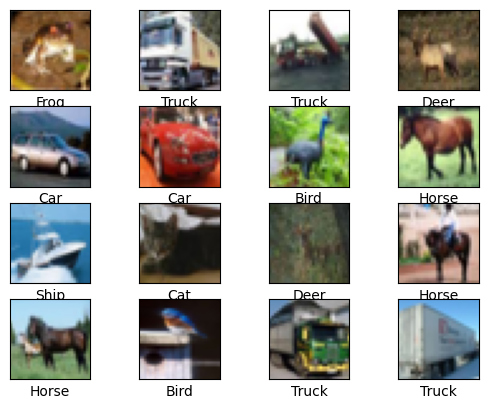

In [9]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
plt.show()

### Training and Testing Images

In [10]:
#training & testing
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

### Convolutional Layer

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))#simplifies to essential details
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels, epochs=10, validation_data=(testing_images,testing_labels))




Epoch 1/10


625/625 [==============================] - 25s 34ms/step - loss: 1.7598 - accuracy: 0.3461 - val_loss: 1.4904 - val_accuracy: 0.4575
Epoch 2/10
625/625 [==============================] - 9s 14ms/step - loss: 1.3949 - accuracy: 0.4963 - val_loss: 1.3654 - val_accuracy: 0.5027
Epoch 3/10
625/625 [==============================] - 9s 14ms/step - loss: 1.2547 - accuracy: 0.5498 - val_loss: 1.2429 - val_accuracy: 0.5660
Epoch 4/10
625/625 [==============================] - 8s 13ms/step - loss: 1.1586 - accuracy: 0.5866 - val_loss: 1.1894 - val_accuracy: 0.5770
Epoch 5/10
625/625 [==============================] - 8s 14ms/step - loss: 1.0727 - accuracy: 0.6226 - val_loss: 1.1024 - val_accuracy: 0.6160
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.9977 - accuracy: 0.6464 - val_loss: 1.0970 - val_accuracy: 0.6180
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.9382 - accuracy: 0.6706 - val_loss: 1.0463 - val_accuracy: 

In [13]:
#check loss and accuracy of the model
loss, accuracy = model.evaluate(testing_images, testing_labels)
print("Loss: ",loss)
print("Accuracy: ",accuracy)

125/125 [==============================] - 1s 7ms/step - loss: 1.0449 - accuracy: 0.6430
Loss:  1.0449167490005493
Accuracy:  0.6430000066757202


low accuracy than should be

In [14]:
#save the model
model.save('imageclassification.model')

INFO:tensorflow:Assets written to: imageclassification.model\assets


INFO:tensorflow:Assets written to: imageclassification.model\assets


In [16]:
#Load the model
model = models.load_model('imageclassification.model')

In [24]:
import os

# Set the directory containing the images
image_dir = 'images'

# Get the list of image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg'))]

# Loop over each image file
for image_file in image_files:
    # Load the image
    img_path = os.path.join(image_dir, image_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Make the prediction
    prediction = model.predict(np.array([img]) / 255)
    index = np.argmax(prediction)  # Index of the highest neuron

    # Print the prediction
    print(f'Prediction for {image_file}: {class_names[index]}')

1/1 [==============================] - 0s 48ms/step
Prediction for cat.jpg: Cat
1/1 [==============================] - 0s 77ms/step
Prediction for deer.jpg: Deer
1/1 [==============================] - 0s 60ms/step
Prediction for dog.jpg: Horse
1/1 [==============================] - 0s 67ms/step
Prediction for truck.jpg: Truck
